In [220]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='joblib')


In [221]:
import pandas as pd
import numpy as np

# Loading the dataset with a different encoding
file_path = 'final_dataset.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

print(df.head())


               disease  anxiety and nervousness  depression  \
0     abdominal hernia                      0.0         0.0   
1  abscess of the lung                      0.0         0.0   
2            achalasia                      0.0         0.0   
3                 acne                      NaN         NaN   
4    actinic keratosis                      0.0         0.0   

   shortness of breath  depressive or psychotic symptoms  sharp chest pain  \
0                  0.0                               0.0               0.0   
1                  1.0                               1.0               0.0   
2                  0.0                               0.0               1.0   
3                  NaN                               NaN               NaN   
4                  0.0                               0.0               0.0   

   dizziness  insomnia  abnormal involuntary movements  chest tightness  ...  \
0        0.0       0.0                             0.0              0.0 

In [222]:

# Replacing NaN values with 0 in the entire dataframe except for specific columns
df.fillna(0, inplace=True)

# Replacing '0' values with NaN in the specific string columns
string_columns = ['precaution_1', 'precaution_2', 'precaution_3', 'precaution_4', 'description']
df[string_columns] = df[string_columns].replace(0, np.nan)

print(df.head())

               disease  anxiety and nervousness  depression  \
0     abdominal hernia                      0.0         0.0   
1  abscess of the lung                      0.0         0.0   
2            achalasia                      0.0         0.0   
3                 acne                      0.0         0.0   
4    actinic keratosis                      0.0         0.0   

   shortness of breath  depressive or psychotic symptoms  sharp chest pain  \
0                  0.0                               0.0               0.0   
1                  1.0                               1.0               0.0   
2                  0.0                               0.0               1.0   
3                  0.0                               0.0               0.0   
4                  0.0                               0.0               0.0   

   dizziness  insomnia  abnormal involuntary movements  chest tightness  ...  \
0        0.0       0.0                             0.0              0.0 

In [223]:
# Dropping columns that are unnamed (those with names starting with 'Unnamed')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

print(df.head())


               disease  anxiety and nervousness  depression  \
0     abdominal hernia                      0.0         0.0   
1  abscess of the lung                      0.0         0.0   
2            achalasia                      0.0         0.0   
3                 acne                      0.0         0.0   
4    actinic keratosis                      0.0         0.0   

   shortness of breath  depressive or psychotic symptoms  sharp chest pain  \
0                  0.0                               0.0               0.0   
1                  1.0                               1.0               0.0   
2                  0.0                               0.0               1.0   
3                  0.0                               0.0               0.0   
4                  0.0                               0.0               0.0   

   dizziness  insomnia  abnormal involuntary movements  chest tightness  ...  \
0        0.0       0.0                             0.0              0.0 

In [224]:
df.drop(columns=['precaution_1', 'precaution_2', 'precaution_3', 'precaution_4', 'description'], inplace=True)


In [225]:
from sklearn.impute import KNNImputer

# Applying KNN Imputation for missing values
imputer = KNNImputer(n_neighbors=5)
X_imputed_array = imputer.fit_transform(df.drop(columns=['disease']))  # Imputing only the features, not the target

# Rebuilding the DataFrame with the same columns and assigning imputed data
X_imputed = pd.DataFrame(X_imputed_array, columns=df.drop(columns=['disease']).columns)

In [226]:
# Target variable
y = df['disease']

Total symptoms analyzed: 377


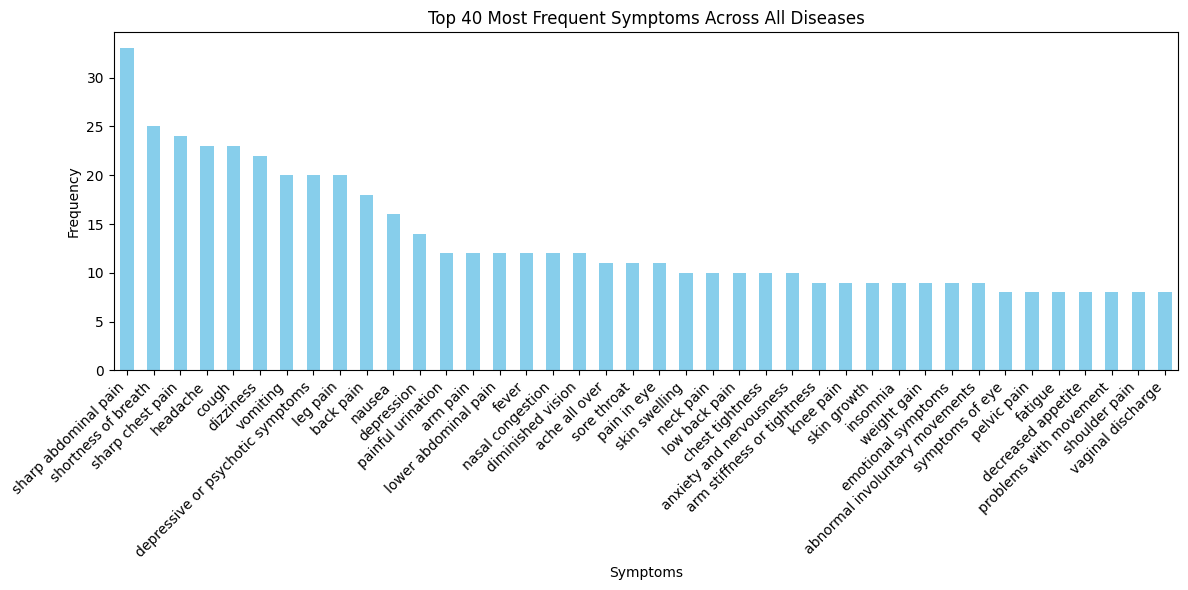

In [227]:
import matplotlib.pyplot as plt

# Summing up the values of each symptom column
# `df.iloc[:, 1:]` includes all columns except the 'disease' column
symptom_frequencies = df.iloc[:, 1:].sum().sort_values(ascending=False)

# Printing the total number of symptoms for verification
print(f"Total symptoms analyzed: {len(symptom_frequencies)}")

# Selecting the top 40 most frequent symptoms for visualization
top_symptoms = symptom_frequencies.head(40)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
top_symptoms.plot(kind='bar', color='skyblue')
plt.title('Top 40 Most Frequent Symptoms Across All Diseases')
plt.xlabel('Symptoms')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


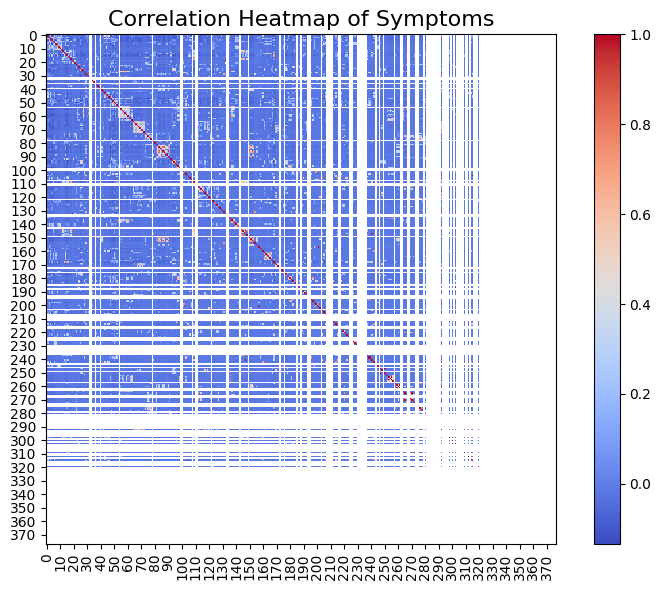

In [228]:



# Computing the correlation matrix
correlation_matrix = df.iloc[:, 1:].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap="coolwarm", interpolation="nearest")
plt.colorbar()
plt.title("Correlation Heatmap of Symptoms", fontsize=16)

# Labeling the axes
plt.xticks(np.arange(0, len(correlation_matrix.columns), 10), rotation=90)
plt.yticks(np.arange(0, len(correlation_matrix.columns), 10))

plt.tight_layout()
plt.show()


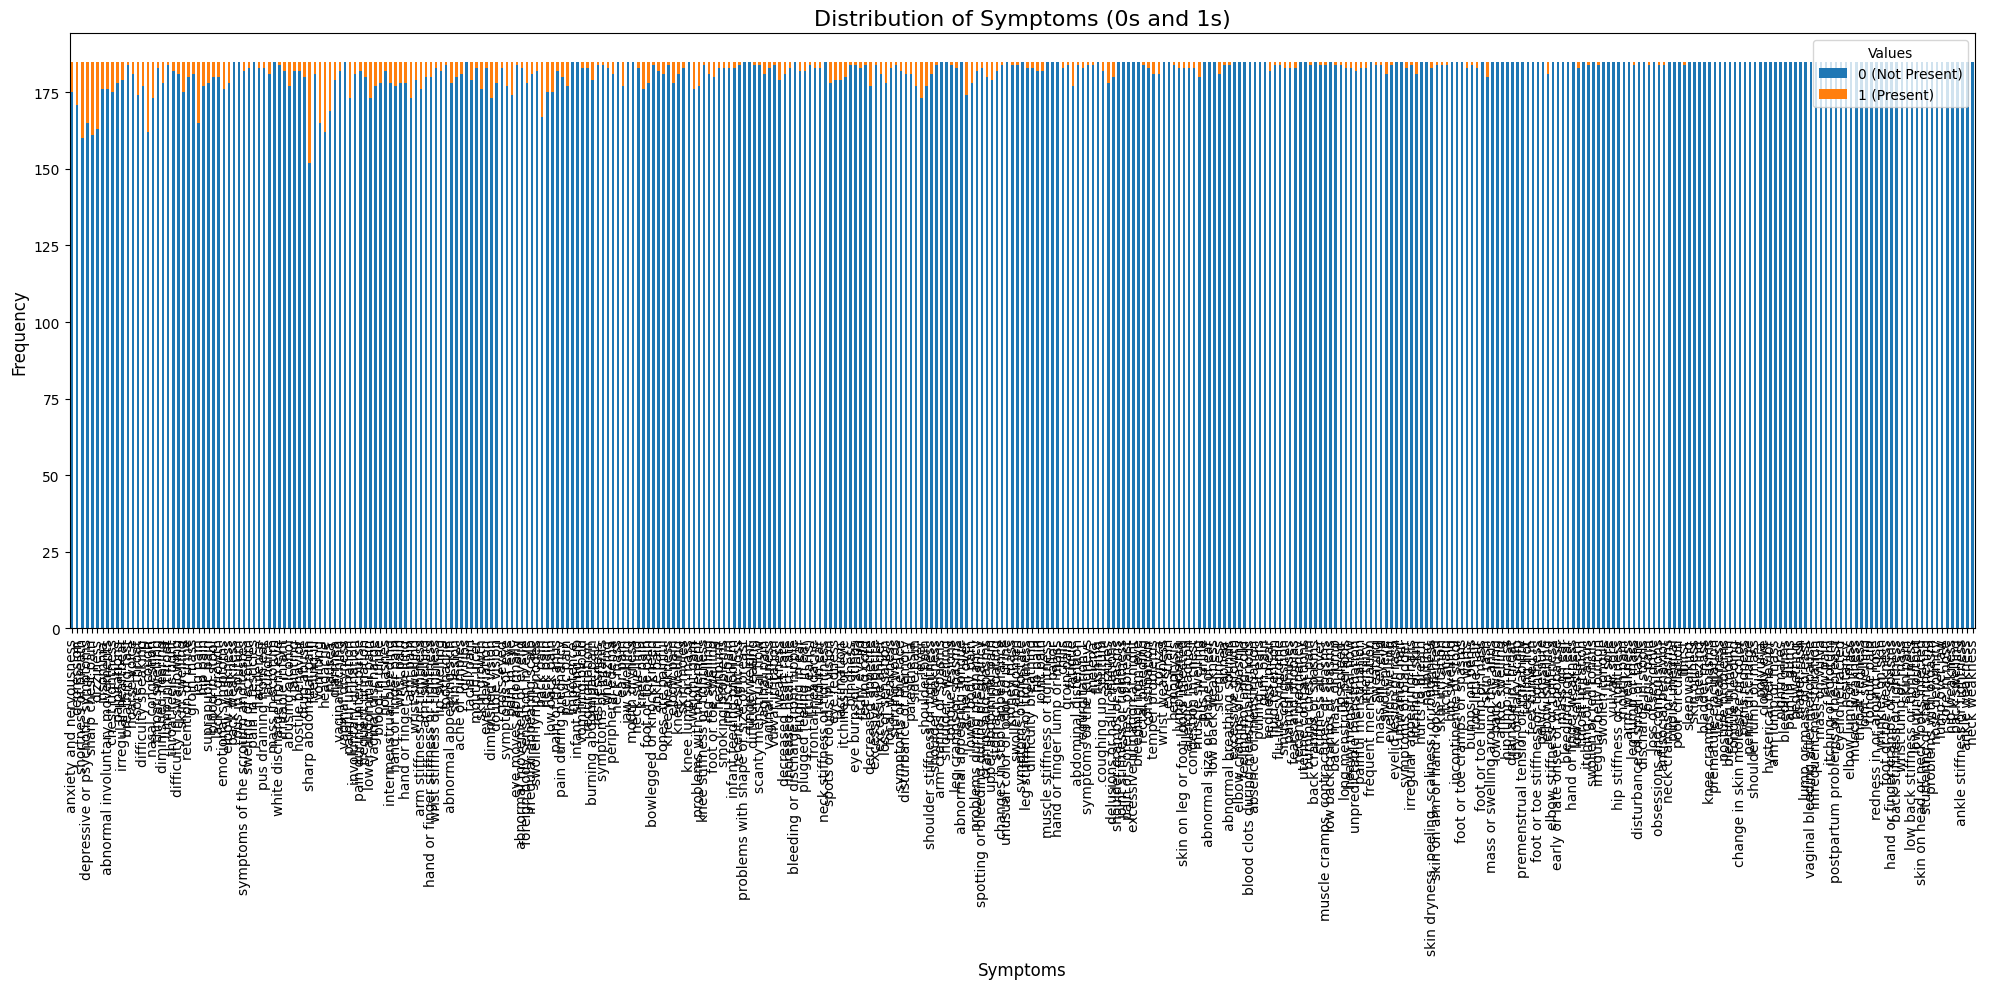

In [229]:

# Counting the occurrences of each value (0 and 1) for every symptom
symptom_value_counts = df.drop('disease', axis=1).apply(pd.Series.value_counts).T.fillna(0)

# Plotting the distribution of 0 and 1 for each symptom
symptom_value_counts.plot(kind='bar', stacked=True, figsize=(20, 10))

# Setting the labels and title
plt.title('Distribution of Symptoms (0s and 1s)', fontsize=16)
plt.xlabel('Symptoms', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=90)
plt.legend(title='Values', labels=['0 (Not Present)', '1 (Present)'])
plt.tight_layout()

plt.show()

**Train Test Split**

In [230]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Checking the shapes of the split datasets
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (148, 377)
Testing data shape: (37, 377)


**Initializing models**

In [231]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Initializing models
log_reg = LogisticRegression(max_iter=1000, random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)

# Creating a dictionary to store models
models = {
    "Logistic Regression": log_reg,
    "Decision Tree": decision_tree,
    "Random Forest": random_forest,
    "K-Nearest Neighbors": knn,
}


In [232]:
from sklearn.preprocessing import LabelEncoder

# Combining y_train and y_test to fit the LabelEncoder on all unique labels
label_encoder = LabelEncoder()
label_encoder.fit(pd.concat([y_train, y_test], axis=0))

# Encoding y_train and y_test
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


In [233]:
# Displaying the classes learned by the LabelEncoder to check if it worked
print("Classes learned by LabelEncoder:", label_encoder.classes_)

Classes learned by LabelEncoder: ['abdominal hernia' 'abscess of the lung' 'achalasia' 'acne'
 'actinic keratosis' 'acute otitis media' 'acute pancreatitis'
 'acute sinusitis' 'allergy' 'alopecia' 'arthritis' 'asthma' 'astigmatism'
 'atelectasis' 'atrial fibrillation' 'atrophic vaginitis'
 'attention deficit hyperactivity disorder (adhd)' 'bipolar disorder'
 'bladder disorder' 'bone spur of the calcaneous' 'bronchial_asthma'
 'bursitis' 'cellulitis or abscess of mouth' 'cerebral palsy'
 'cervical_spondylosis' 'chalazion' 'chicken_pox' 'choledocholithiasis'
 'cholesteatoma' 'chorioretinitis' 'chronic kidney disease'
 'chronic obstructive pulmonary disease (copd)' 'chronic pain disorder'
 'chronic sinusitis' 'cirrhosis' 'coagulation (bleeding) disorder'
 'colonic polyp' 'common_cold' 'complex regional pain syndrome'
 'concussion' 'conductive hearing loss' 'conversion disorder'
 'cornea infection' 'corneal disorder' 'coronary atherosclerosis'
 'cranial nerve palsy' 'crushing injury' 'cryp

In [234]:
# Comparing original and encoded labels for y_train
print("Original y_train labels:", y_train.head())
print("Encoded y_train labels:", y_train_encoded[:5])

# Comparing original and encoded labels for y_test
print("Original y_test labels:", y_test.head())
print("Encoded y_test labels:", y_test_encoded[:5])


Original y_train labels: 65                          fetal alcohol syndrome
67                                       flat feet
31    chronic obstructive pulmonary disease (copd)
12                                     astigmatism
41                             conversion disorder
Name: disease, dtype: object
Encoded y_train labels: [65 67 31 12 41]
Original y_test labels: 19     bone spur of the calcaneous
42                cornea infection
156        salivary gland disorder
111                    mastoiditis
148           pulmonary congestion
Name: disease, dtype: object
Encoded y_test labels: [ 19  42 156 111 148]


In [235]:
# Checking the number of unique labels in y_train and y_test
print("Unique labels in y_train:", y_train.nunique())
print("Unique labels in y_test:", y_test.nunique())
print("Total unique labels:", len(label_encoder.classes_))

Unique labels in y_train: 148
Unique labels in y_test: 37
Total unique labels: 185


In [236]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train_encoded)
print("Class distribution after SMOTE:", Counter(y_train_res))


Class distribution after SMOTE: Counter({np.int64(65): 1, np.int64(67): 1, np.int64(31): 1, np.int64(12): 1, np.int64(41): 1, np.int64(136): 1, np.int64(90): 1, np.int64(147): 1, np.int64(104): 1, np.int64(109): 1, np.int64(38): 1, np.int64(120): 1, np.int64(96): 1, np.int64(76): 1, np.int64(159): 1, np.int64(2): 1, np.int64(133): 1, np.int64(46): 1, np.int64(173): 1, np.int64(155): 1, np.int64(85): 1, np.int64(150): 1, np.int64(26): 1, np.int64(158): 1, np.int64(177): 1, np.int64(115): 1, np.int64(78): 1, np.int64(36): 1, np.int64(128): 1, np.int64(22): 1, np.int64(108): 1, np.int64(122): 1, np.int64(114): 1, np.int64(11): 1, np.int64(180): 1, np.int64(145): 1, np.int64(6): 1, np.int64(27): 1, np.int64(93): 1, np.int64(4): 1, np.int64(32): 1, np.int64(100): 1, np.int64(143): 1, np.int64(101): 1, np.int64(168): 1, np.int64(10): 1, np.int64(118): 1, np.int64(132): 1, np.int64(0): 1, np.int64(139): 1, np.int64(70): 1, np.int64(95): 1, np.int64(64): 1, np.int64(44): 1, np.int64(152): 1, n

In [237]:
# Training the Logistic Regression model
log_reg.fit(X_train, y_train_encoded)

LogisticRegression(max_iter=1000, random_state=42)

In [238]:
# Training the Decision Tree model
decision_tree.fit(X_train, y_train_encoded)

DecisionTreeClassifier(random_state=42)

In [239]:
# Training the Random Forest model
random_forest.fit(X_train, y_train_encoded)

RandomForestClassifier(random_state=42)

In [240]:
# Training the K-Nearest Neighbors model
knn.fit(X_train, y_train_encoded)

KNeighborsClassifier()

In [241]:
# Predicting with Logistic Regression
log_reg_predictions = log_reg.predict(X_test)

# Predicting with Decision Tree
decision_tree_predictions = decision_tree.predict(X_test)

# Predicting with Random Forest
random_forest_predictions = random_forest.predict(X_test)

# Predicting with K-Nearest Neighbors
knn_predictions = knn.predict(X_test)

In [242]:
from sklearn.metrics import classification_report

# Evaluating Logistic Regression
print("Logistic Regression Report:")
print(classification_report(y_test_encoded, log_reg_predictions))

# Evaluating Decision Tree
print("Decision Tree Report:")
print(classification_report(y_test_encoded, decision_tree_predictions))

# Evaluating Random Forest
print("Random Forest Report:")
print(classification_report(y_test_encoded, random_forest_predictions))

# Evaluating K-Nearest Neighbors
print("K-Nearest Neighbors Report:")
print(classification_report(y_test_encoded, knn_predictions))


Logistic Regression Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00       0.0
           5       0.00      0.00      0.00       0.0
           9       0.00      0.00      0.00       1.0
          12       0.00      0.00      0.00       0.0
          15       0.00      0.00      0.00       1.0
          16       0.00      0.00      0.00       1.0
          18       0.00      0.00      0.00       1.0
          19       0.00      0.00      0.00       1.0
          23       0.00      0.00      0.00       0.0
          24       0.00      0.00      0.00       1.0
          29       0.00      0.00      0.00       1.0
          30       0.00      0.00      0.00       1.0
          35       0.00      0.00      0.00       1.0
          42       0.00      0.00      0.00       1.0
          45       0.00      0.00      0.00       1.0
          50       0.00      0.00      0.00       0.0
          51       0.00      0.00      0.00       1.0

C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(res

In [243]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Scaling the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaled Training Data Shape:", X_train_scaled.shape)
print("Scaled Testing Data Shape:", X_test_scaled.shape)

Scaled Training Data Shape: (148, 377)
Scaled Testing Data Shape: (37, 377)


In [244]:
from sklearn.ensemble import IsolationForest

# Initialize the Isolation Forest model
model = IsolationForest(contamination=0.1, random_state=42)

# Fit the model to the training data
model.fit(X_train_scaled)

# Predict anomalies in the test set
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Convert predictions: 1 for normal, -1 for anomaly
y_train_pred = (y_train_pred == -1).astype(int)  # Convert anomalies to 1
y_test_pred = (y_test_pred == -1).astype(int)    # Convert anomalies to 1

print(f"Anomalies in the Training Set: {y_train_pred.sum()}")
print(f"Anomalies in the Testing Set: {y_test_pred.sum()}")


Anomalies in the Training Set: 15
Anomalies in the Testing Set: 0


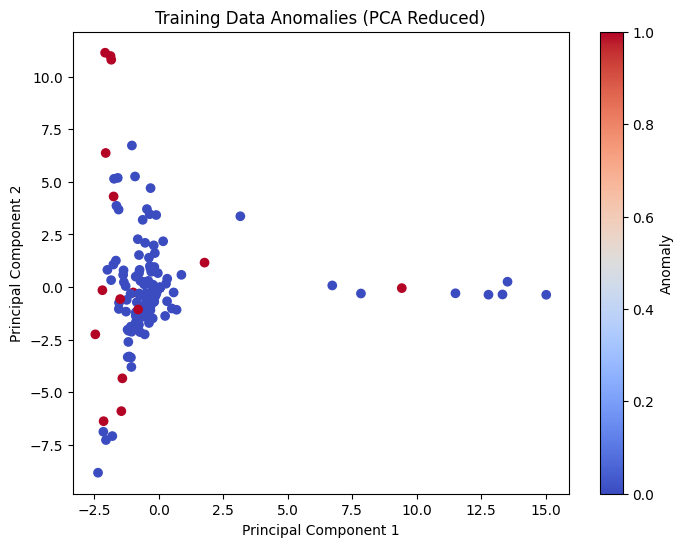

In [245]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce features to 2D for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

# Plot the anomalies
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_pred, cmap='coolwarm', label='Anomalies')
plt.title("Training Data Anomalies (PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Anomaly')
plt.show()


In [246]:
from sklearn.metrics import classification_report

# Evaluate the model using classification metrics
print("Training Set Classification Report:")
print(classification_report(y_train_encoded, y_train_pred))

print("Testing Set Classification Report:")
print(classification_report(y_test_encoded, y_test_pred))


Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.01      1.00      0.01         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00  

C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

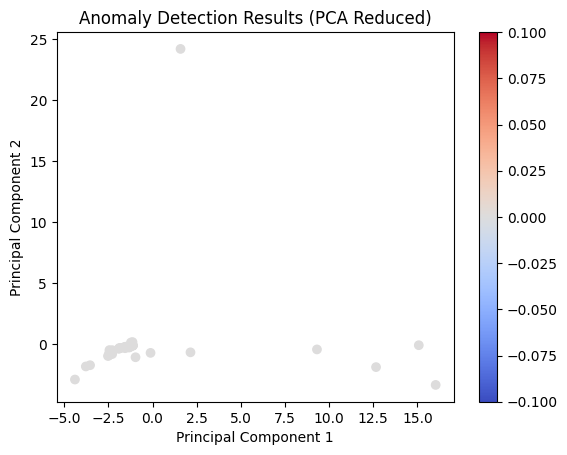

In [247]:
from sklearn.decomposition import PCA

# Apply PCA to reduce features to 2D for visualization
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test_scaled)

# Visualizing anomalies in 2D
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test_pred, cmap='coolwarm', label='Anomalies')
plt.title("Anomaly Detection Results (PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()


Hybrid Approach Implementation

In [248]:
# Initializing both models
supervised_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)

anomaly_detector = IsolationForest(
    contamination=0.05,
    n_estimators=200,
    max_samples='auto',
    random_state=42
)

# Training both models
print("Training Supervised Model...")
supervised_model.fit(X_train_scaled, y_train_encoded)

print("\nTraining Anomaly Detector...")
anomaly_detector.fit(X_train_scaled)  # Unsupervised training

# Making predictions
# Disease classification predictions
y_train_disease = supervised_model.predict(X_train_scaled)
y_test_disease = supervised_model.predict(X_test_scaled)

# Anomaly detection predictions
y_train_anomaly = (anomaly_detector.predict(X_train_scaled) == -1).astype(int)
y_test_anomaly = (anomaly_detector.predict(X_test_scaled) == -1).astype(int)

# Combined Evaluation
print("\n=== Disease Classification Report ===")
print("Training Set:")
print(classification_report(y_train_encoded, y_train_disease))
print("\nTesting Set:")
print(classification_report(y_test_encoded, y_test_disease))

print("\n=== Anomaly Detection Report ===")
print("Note: Anomaly detection is unsupervised - these are pseudo-labels")
print("Training Set Anomaly Rate:", np.mean(y_train_anomaly))
print("Testing Set Anomaly Rate:", np.mean(y_test_anomaly))

# Combined Predictions Example
def hybrid_predict(X_imputed):
    """Returns both disease and anomaly predictions"""
    return {
        'disease': supervised_model.predict(X_imputed),
        'anomaly': (anomaly_detector.predict(X_imputed) == -1).astype(int),
        'disease_proba': supervised_model.predict_proba(X_imputed),
        'anomaly_score': anomaly_detector.decision_function(X_imputed)
    }

# Example usage
sample_idx = 0
print("\nSample Prediction:")
print("Input Features:", X_test_scaled[sample_idx])
print("True Label:", y_test_encoded[sample_idx])
print("Hybrid Prediction:", hybrid_predict(X_test_scaled[sample_idx:sample_idx+1]))

Training Supervised Model...

Training Anomaly Detector...

=== Disease Classification Report ===
Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          17       1.00      1.00      1.00         1
          20       0.00

C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

In [249]:
import joblib

# Saving all components
joblib.dump({
    'supervised_model': supervised_model,
    'anomaly_detector': anomaly_detector,
    'feature_names': list(X_imputed.columns)
}, 'hybrid_model_package.joblib')

# To make loading as single operation easier later
models = joblib.load('hybrid_model_package.joblib')
supervised_model = models['supervised_model']
anomaly_detector = models['anomaly_detector']
feature_names = models['feature_names']